Data from:
Yan, Q., Stegen, J. C., Yu, Y., Deng, Y., Li, X., Wu, S., ... & Ni, J. (2017). Nearly a decade‐long repeatable seasonal diversity patterns of bacterioplankton communities in the eutrophic Lake Donghu (Wuhan, China). Molecular ecology, 26(14), 3839-3850.

In [56]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import glob
import os
import sys

import easyCGD



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Parse the metadata

In [76]:
meta_df = pd.read_csv("~/SGD_empirical/empirical_aquatic_metagenome/metadata.txt", delim_whitespace=True)
meta_df = meta_df[meta_df.Sample != "DH93"]
#meta_df = meta_df.set_index("Sample")
meta_df["Sampling_time"] = meta_df["Sampling_time"].apply(str)
meta_df

,Sample,Sampling_time,Sampling_station
0,DH1,2007.4,I
1,DH2,2007.4,II
2,DH3,2007.4,III
3,DH4,2007.4,IV
4,DH5,2007.4,V
5,DH6,2007.7,I
6,DH7,2007.7,II
7,DH8,2007.7,III
8,DH9,2007.7,IV
9,DH10,2007.7,V


## Make pi files per sample
### This is slow


In [ ]:
obsdir = "/home/isaac/SGD_empirical/empirical_aquatic_metagenome/aquatic_metagenome_fasta/"
fastadirs = glob.glob(obsdir+"/*")
dfs = {}
for d in fastadirs:
    sample_name = d.split("/")[-1].split(".")[0]
    print(sample_name, d)
    dfs[sample_name] = easyCGD.get_pis_from_fastas(d, outfile="aquatic_obs/"+sample_name+".pis", colname=sample_name)

## Give the files more sensible names and organize them according to sample site

In [15]:
print("Nsamples = {}".format(len(meta_df)))
locs = set(meta_df.Sampling_station)
print("Nlocs = {}".format(locs))
## Make the output directories
for loc in locs:
    print(loc)
    locdir = "aquatic_obs/{}/".format(loc)
    if not os.path.exists(locdir):
        os.mkdir(locdir)

created = []
for samp in meta_df.Sample:
        tmp = meta_df[meta_df.Sample == samp].values[0]
        sampobs = samp + "_16S.pis"
        new_name = tmp[2] + "-" + tmp[1].replace(".", "_")
        if new_name in created:
            new_name = new_name + "_1"
        created.append(new_name)
        new_name = new_name +  ".pis"
        os.rename("aquatic_obs/{}".format(sampobs),\
                  "aquatic_obs/{}".format(new_name))

## Move each sample to the location it wants to be
for f in glob.glob("aquatic_obs/*.pis"):
    out = f.split("/")[-1].split("-")[0]
    os.rename(f, "aquatic_obs/{}/{}".format(out, f.split("/")[-1]))


134


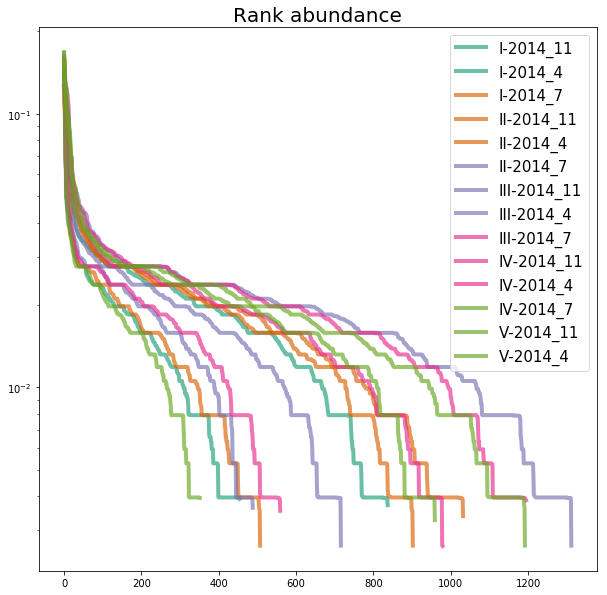

In [68]:
site_samps = glob.glob("aquatic_obs/*/*2014*".format("I"))
site_samps.sort()
site_samps
cmap = {"I":"#1b9e77",
        "II":"#d95f02",
        "III":"#7570b3",
        "IV":"#e7298a",
        "V":"#66a61e"}

fig, ax = plt.subplots(figsize=(10,10))
for i, x in enumerate(site_samps[1:]):
    site = x.split("/")[-1].split("-")[0]
    easyCGD.plot_RACs(easyCGD.load_data(site_samps[i]), ax=ax, color=cmap[site])

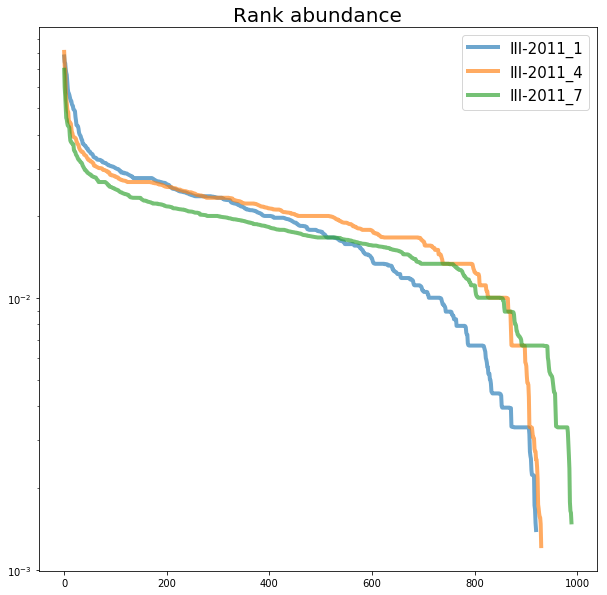

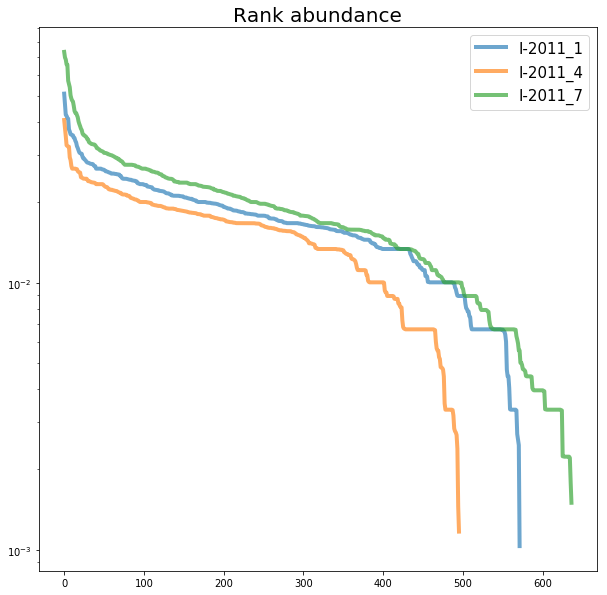

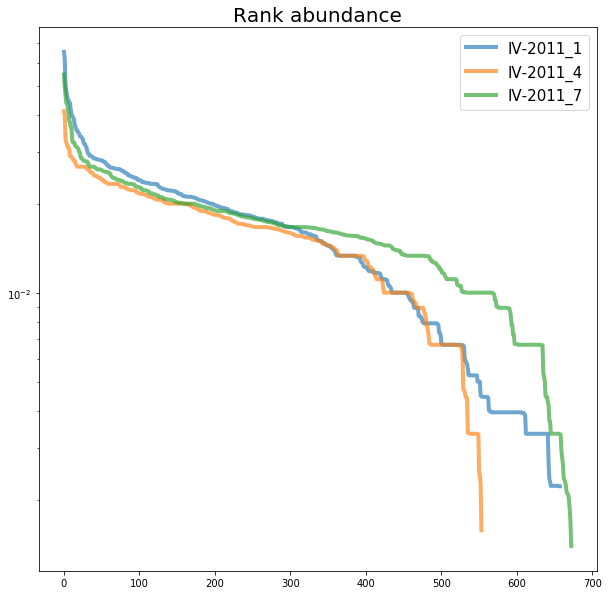

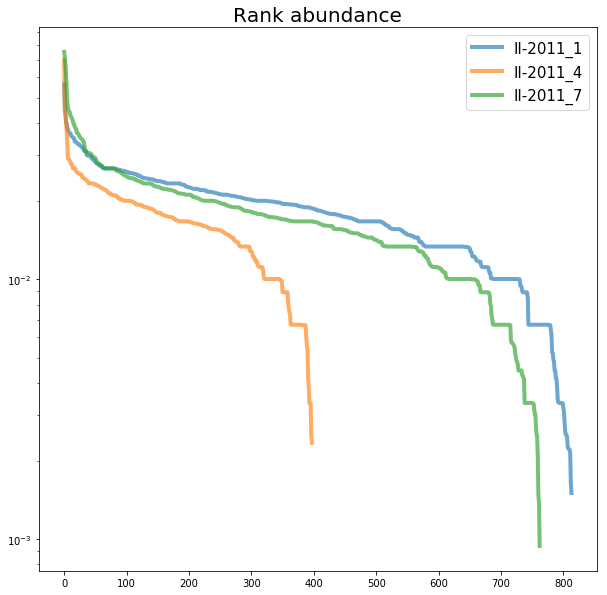

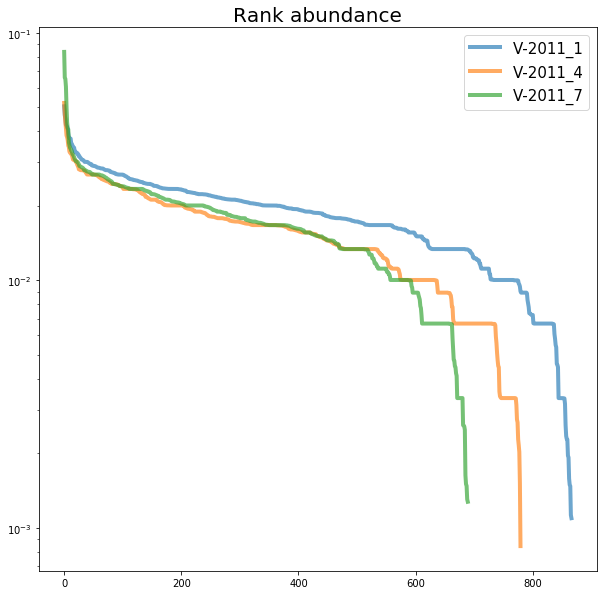

In [79]:
for site in locs:
    site_samps = glob.glob("aquatic_obs/*/{}-2011*".format(site))
    site_samps.sort()
    site_samps
    fig, ax = plt.subplots(figsize=(10,10))
    for i, x in enumerate(site_samps):
        easyCGD.plot_RACs(easyCGD.load_data(site_samps[i]), ax=ax)

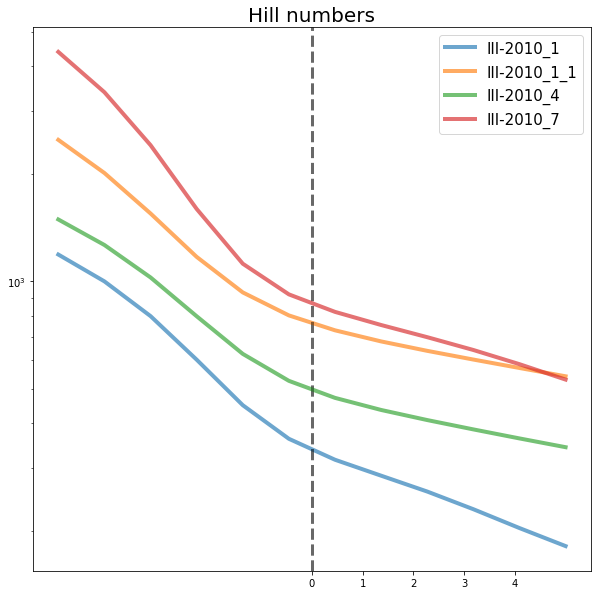

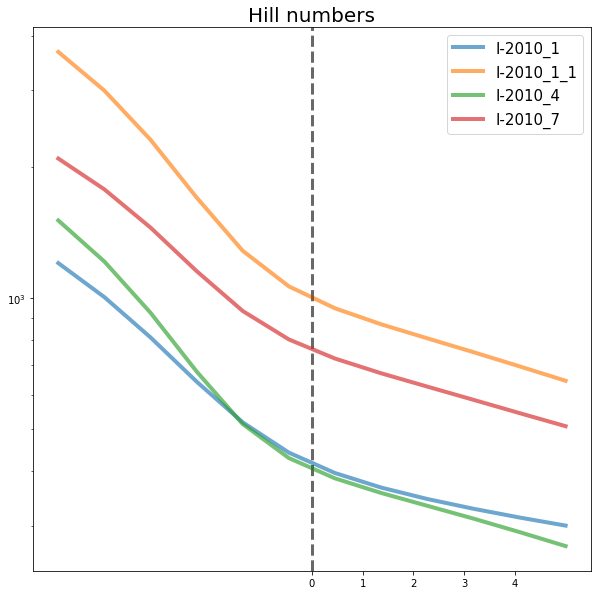

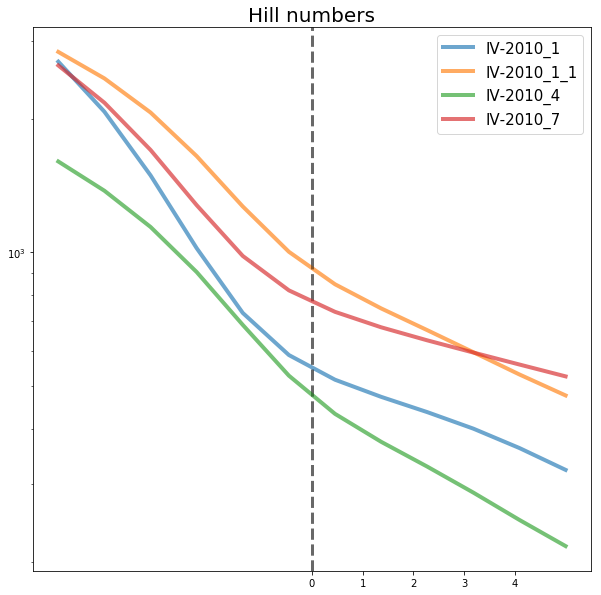

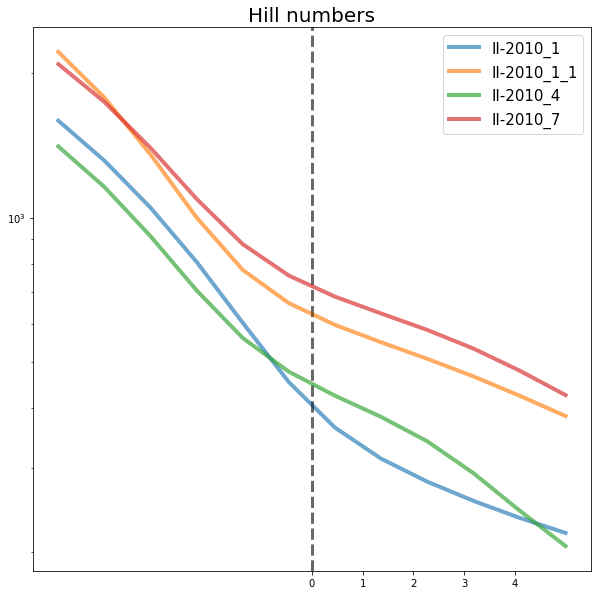

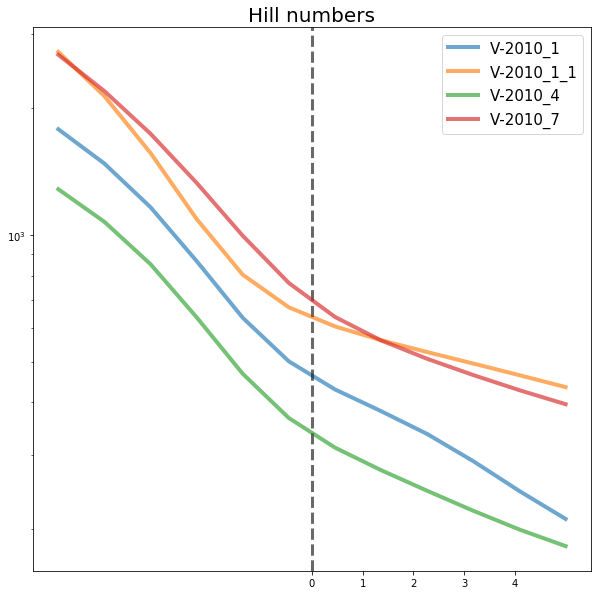

In [80]:
for site in locs:
    site_samps = glob.glob("aquatic_obs/*/{}-2010*".format(site))
    site_samps.sort()
    site_samps
    fig, ax = plt.subplots(figsize=(10,10))
    for i, x in enumerate(site_samps):
        easyCGD.plot_hill_numbers(easyCGD.load_data(site_samps[i]), ax=ax, do_negative=True)